In [1]:
import warnings
warnings.simplefilter('ignore')

from sklearn.datasets import load_diabetes
import statsmodels.api as sm

from statsmodels.regression.linear_model import OLS

from sklearn.model_selection import train_test_split as tts
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.DataFrame(load_diabetes().data, columns = load_diabetes().feature_names)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [4]:
target = pd.Series(load_diabetes().target)
target

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Length: 442, dtype: float64

In [5]:
X_train, x_test, y_train, y_test = tts(df,target)

In [8]:
X = sm.add_constant(X_train)
modelo = OLS(y_train,X).fit()

In [9]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     35.92
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           1.18e-46
Time:                        10:03:13   Log-Likelihood:                -1787.5
No. Observations:                 331   AIC:                             3597.
Df Residuals:                     320   BIC:                             3639.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.4437      3.008     51.004      0.000     147.525     159.363
age           85.6327     72.273      1.185      0.237     -56.558     227.823
sex         -262.0489     70.594     -3.712      0.000    -400.935    -123.163
bmi          495.6959     79.653      6.223      0.000     338.986     652.406
bp           301.6854     79.561      3.792      0.000     145.157     458.214
s1          -797.7970    501.473     -1.591      0.113   -1784.396     188.803
s2           396.3122    410.066      0.966      0.335    -410.455    1203.079
s3            63.1760    251.740      0.251      0.802    -432.098     558.450
s4           174.3691    185.039      0.942      0.347    -189.677     538.415
s5           789.8223    202.466      3.901      0.000     391.489    1188.155
s6            32.6780     77.154      0.424      0.672    -119.115     184.471
==============================================================================
Omnibus:                        2.446   Durbin-Watson:                   2.329
Prob(Omnibus):                  0.294   Jarque-Bera (JB):                1.961
Skew:                           0.020   Prob(JB):                        0.375
Kurtosis:                       2.625   Cond. No.                         235.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
X = X[['const','sex','bmi','bp','s5']]
modelo = OLS(y_train,X).fit()


In [13]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     77.20
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           5.35e-46
Time:                        10:05:14   Log-Likelihood:                -1801.8
No. Observations:                 331   AIC:                             3614.
Df Residuals:                     326   BIC:                             3633.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.6309      3.104     49.488      0.000     147.524     159.738
sex         -161.2874     67.064     -2.405      0.017    -293.220     -29.354
bmi          567.4162     76.982      7.371      0.000     415.972     718.860
bp           293.4141     78.088      3.757      0.000     139.794     447.034
s5           583.3482     77.780      7.500      0.000     430.334     736.362
==============================================================================
Omnibus:                        5.562   Durbin-Watson:                   2.358
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                4.108
Skew:                           0.145   Prob(JB):                        0.128
Kurtosis:                       2.537   Cond. No.                         29.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
y_pred = modelo.predict(X)

In [14]:
from sklearn.metrics import mean_squared_error as mse

###### MSE


$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}$$


pertenece al intervalo [0, +$\infty$)

In [27]:
m = mse(y_train,y_pred, squared=True)

In [28]:
m

3130.3654454741977

###### RMSE


$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}}$$


pertenece al intervalo [0, +$\infty$)

In [29]:
m = mse(y_train,y_pred, squared= False)

In [30]:
m

55.9496688593793

###### MAE


$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i-\hat{y}_i|$$


pertenece al intervalo [0, +$\infty$)

In [31]:
from sklearn.metrics import mean_absolute_error as mae

In [32]:
m = mae(y_train,y_pred)

In [33]:
m

46.67968032476891

![](data/r2.png)
![](data/r2adj.png)

In [34]:
from sklearn.metrics import r2_score as r2

In [36]:
r2(y_train, y_pred)

0.48646017850001944

In [37]:
from sklearn.datasets import load_wine
from sklearn.svm import SVC

In [38]:
data = load_wine()

In [39]:
x_train, x_test, y_train,y_test = tts(data.data, data.target)

In [40]:
svc = SVC(kernel = 'linear').fit(x_train,y_train)

y_pred = svc.predict(x_test)

In [41]:
y_test

array([1, 2, 1, 2, 1, 2, 2, 0, 1, 1, 0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 2, 2, 1, 2, 1, 1, 0, 2, 1, 1, 2, 1,
       1])

In [42]:
y_pred

array([1, 1, 1, 2, 1, 2, 2, 0, 1, 1, 0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1, 2, 1, 1, 0, 2, 1, 1, 2, 1,
       1])

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
conf = confusion_matrix(y_test,y_pred)

In [45]:
conf

array([[13,  0,  0],
       [ 2, 19,  0],
       [ 0,  1, 10]], dtype=int64)

<AxesSubplot:>

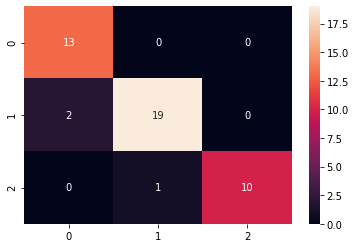

In [46]:
import seaborn as sns
sns.heatmap(conf, annot=True)


![](data/confu.jpg)

# EXACTITUD
![](data/acc.png) 
# Numero de verdaderos correctos sobre todos los correctos
![](data/recall.png)

![](data/prec.png)
![](data/dclas.png)

In [48]:
from sklearn.metrics import accuracy_score as acc
#Accuracy

In [49]:
acc(y_test,y_pred)

0.9333333333333333

In [50]:
from sklearn.metrics import precision_score as prec

In [51]:
prec(y_test, y_pred, average='macro')

0.9388888888888888

In [52]:
from sklearn.metrics import recall_score as rec

rec(y_test, y_pred, average='macro')

0.937950937950938

##### ROC-AUC  (Característica operativa del receptor y área debajo de la curva)

+ TPR := TP/(TP+FN)
+ FPR := FP/(TN+FP)

![](data/roc.png)

In [54]:
from sklearn.metrics import roc_curve as roc
from sklearn.metrics import roc_auc_score as auc

In [55]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

data=load_breast_cancer()

X_train, X_test, y_train, y_test=tts(data.data, data.target)


svc=SVC(probability=True).fit(X_train, y_train)

y_pred=svc.predict(X_test)

y_prob=svc.predict_proba(X_test)[::, 1]

In [57]:
y_test

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1])

In [58]:
import matplotlib.pyplot as plt

In [59]:
roc(y_test, y_pred)

(array([0.        , 0.17857143, 1.        ]),
 array([0.        , 0.96551724, 1.        ]),
 array([2, 1, 0]))

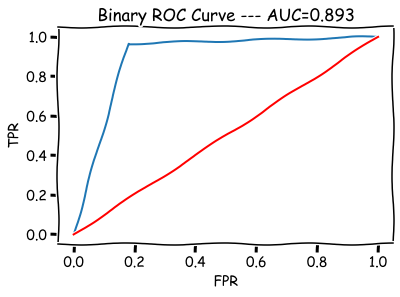

In [62]:
with plt.xkcd(): 
    fpr, tpr, umbrales=roc(y_test, y_pred)
    a=auc(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.plot(fpr, fpr, 'r-')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Binary ROC Curve --- AUC={:.3f}'.format(a))
    plt.show();

In [63]:
df=pd.read_csv('data/diamonds.csv')
df=df.dropna()

df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [64]:
df.drop('Unnamed: 0', inplace = True, axis = 1)

In [65]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [66]:
X=df.drop('price', axis=1)
y=df.price

In [67]:
from sklearn import preprocessing

In [68]:
enc = preprocessing.LabelEncoder()
cut = enc.fit(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'])
cut

LabelEncoder()

In [69]:
enc = preprocessing.LabelEncoder()
color = enc.fit(['J','I','H','G','F','E','D'])

In [70]:
enc = preprocessing.LabelEncoder()
clarity = enc.fit(['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'])

In [71]:
cut.transform(['Premium'])

array([3], dtype=int64)

In [73]:
df['color'] =  color.transform(X['color'])
df['cut'] = cut.transform(X['cut'])
df['clarity'] = clarity.transform(X['clarity'])

In [74]:
X=df.drop('price', axis=1)
y=df.price

In [75]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74


In [76]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [77]:
X_train, X_test, y_train, y_test=tts(X, y)

In [79]:
import hyperopt as hp

In [89]:
space = {
    'n_estimators':hp.quniform('n_estimators',10,1000,25),
    
    'learning_rate': hp.uniform('learning_rate',0.0001,1.0),
    
    'max_depth': hp.quniform('x_max_depth', 4,16,1),
    
    'min_child_weight':hp.quniform('x_min_child', 1,10,1),
    
    'subsample': hp.uniform('x_subsample', 0.7,1),
    
    'gamma':hp.uniform('x_gamma', 0.1, 0.5),
    
    'reg_lambda':hp.uniform('x_reg_lambda', 0, 1),
}

In [90]:
import xgboost as xgb

In [ ]:
xgb.XGBRegressor()

In [99]:
def objetivo(x): #x es el espacio de hyper parametros
    modelo = xgb.XGBRegressor(
            n_estimators = int(x['n_estimators']), #45
            learning_rate = x['learning_rate'],# 0.05
            max_depth = int(x['max_depth']),
            min_child_weight = x['min_child_weight'],
            subsample = x['subsample'],
            gamma = x['gamma'],
            reg_lambda = x['reg_lambda'],
            objective = 'reg:squarederror')
    
    eval_set = [(X_train, y_train), (X_test,y_test)]
    
    #entrenar tu modelo
    modelo.fit(X_train,y_train, eval_set = eval_set, eval_metric = 'rmse', verbose = False)
    
    y_pred = modelo.predict(X_test)
    rmse = mse(y_test, y_pred, squared= False)
    
    return {'loss':rmse, 'status':STATUS_OK}

In [100]:
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
from hyperopt.pyll import scope as ho_scope
from hyperopt.pyll.stochastic import sample as ho_sample

In [101]:
trials_reg = Trials()

In [102]:
best = fmin(fn = objetivo, space = space, algo= tpe.suggest, max_evals = 10, trials = Trials())

100%|█████████████████████████████████████████████████| 10/10 [01:49<00:00, 10.91s/trial, best loss: 561.9783444957537]


In [104]:
best

{'learning_rate': 0.13750953308841096,
 'n_estimators': 425.0,
 'x_gamma': 0.3440781517577263,
 'x_max_depth': 10.0,
 'x_min_child': 9.0,
 'x_reg_lambda': 0.797728790126024,
 'x_subsample': 0.8016594336384937}

In [105]:
modelo = xgb.XGBRegressor(**best)

In [106]:
modelo.fit(X_train,y_train)

TypeError: 'float' object cannot be interpreted as an integer